In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from rfms.readers import ForestReader
from rfms.storytellers import individual_signed_feature_importance
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('../data/enhancer.csv', index_col=0)
data.head()

,H3_c12,H3_c14a,H3_c14c,H3_c8,H3K18ac_c12,H3K18ac_c14a,H3K18ac_c14c,H3K18ac_c8,H3K27ac_c12,H3K27ac_c14a,...,shn2,shn3,slp1,sna1,sna2,tll1,twi1,twi2,z2,active
VT0002,6,10,10,8,5,7,8,9,12,17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0
VT0003,6,7,6,5,19,10,11,0,4,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0
VT0004,14,9,14,13,11,9,19,10,1,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.20130,0
VT0005,13,17,13,13,19,14,25,10,29,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0
VT0006,6,6,6,10,13,23,28,10,8,69,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.21019,1


In [7]:
data.iloc[:,:-1].head()

,H3_c12,H3_c14a,H3_c14c,H3_c8,H3K18ac_c12,H3K18ac_c14a,H3K18ac_c14c,H3K18ac_c8,H3K27ac_c12,H3K27ac_c14a,...,run2,shn2,shn3,slp1,sna1,sna2,tll1,twi1,twi2,z2
VT0002,6,10,10,8,5,7,8,9,12,17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
VT0003,6,7,6,5,19,10,11,0,4,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
VT0004,14,9,14,13,11,9,19,10,1,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.20130
VT0005,13,17,13,13,19,14,25,10,29,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
VT0006,6,6,6,10,13,23,28,10,8,69,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.21019


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    np.array(data.iloc[:,:-1]), np.array(data.iloc[:,-1]), train_size=0.9,
    random_state=2017)
rf = RandomForestClassifier(
    n_estimators=10, random_state=1231, max_depth = 2, bootstrap=True)
rf.fit(X=X_train, y=y_train)
#print(rf.estimators_[0].tree_.value[0])
b = ForestReader()
b.read_from(rf, X_test, TreeReaderType = 'Importance')
b.summary()
out, feature_importances_ = individual_signed_feature_importance(b, y_test)
print(out.head())
print(rf.feature_importances_)
print(feature_importances_)

/home/yu/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Here is the summary.
Number of features is 80
Number of samples is 781
Number of paths is 40
Some samples from self.info_
   f0 f1 f2 f3 f4 f5 f6 f7 f8 f9    ...       s774   s775   s776   s777  \
5   0  0  0  0  0  0  0  0  0  0    ...      False  False  False  False   
28  0  0  0  0  0  0  0  0  0  0    ...       True   True   True   True   
39  0  0  0  0  0  0  0  0  0  0    ...      False  False  False  False   
4   0  0  0  0  0  0  0  0  0  0    ...       True   True   True   True   
16  0  0  0  0  0  0  0  0  0  0    ...       True   True  False   True   
18  0  0  0  0  0  0  0  0  0  0    ...      False  False   True  False   
29  0  0  0  0  0  0  0  0  0  0    ...      False  False  False  False   
14  0  0  0  0  0  0  0  0  0  0    ...      False  False  False  False   
24  0  0  0  0  0  0  0  0  0  0    ...       True   True   True   True   
25  0  0  0  0  0  0  0  0  0  0    ...      False  False  False  False   

     s778   s779   s780 tree_id leaf_id pred_label  

45 wt_ZLD 0.11197592703


Text(0.5,0,'feature values')

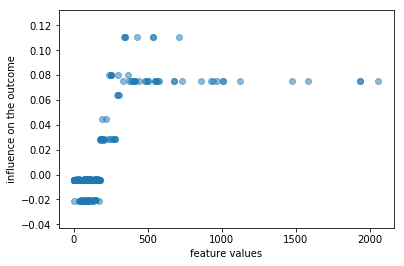

In [109]:
tmp = np.argsort(feature_importances_)[-2]
print(tmp,data.columns[tmp], rf.feature_importances_[tmp])
ind = tmp
plt.scatter(X_test[:,ind], out.loc[:,'f'+str(ind)], alpha=.5)
plt.ylabel('influence on the outcome')
plt.xlabel('feature values')

In [61]:
group1 = (out.loc[:,'f45'] < -0.01) & (X_test[:,45] < 250)
group2 = (out.loc[:,'f45'] > -0.01) & (X_test[:,45] < 250) & (out.loc[:,'f45'] < 0.02)

(80,) (80,)
[28 24 20 19 44 27 45 23 10  9  6 35  5 34 36 51 66 49  4 50 48 77 78 55 58
 53 56 67 59 79 64 63 73 43 76 68 69 54 60 57 21 47 75 32 65 37 62 46 72 70
 61 52 71 31 74 39  8 30 41  3 26 40  0  1 38  7 18 29  2 42 11 33 15 12 16
 17 13 22 14 25]
[  2.77660282e+00   2.90590361e+00   5.72485423e+00   1.65297917e+00
  -1.25220770e+00  -3.31231572e+00  -3.90558025e+00   3.07817619e+00
   1.15601160e+00  -7.98711927e+00  -8.81322526e+00   6.12426927e+00
   7.35824133e+00   1.09940750e+01   1.54505929e+01   7.04982825e+00
   7.78297616e+00   8.31425169e+00   3.57095275e+00  -2.17127657e+01
  -3.79098678e+01  -3.20188492e-01   1.45933339e+01  -9.74039828e+00
  -4.18751526e+01   2.17832215e+01   1.97163896e+00  -1.26735736e+01
  -4.48215319e+01   4.64904818e+00   1.19446407e+00   1.35265810e-01
  -1.98600907e-01   6.88018722e+00  -3.10541904e+00  -3.71792969e+00
  -2.33404049e+00  -1.00734160e-01   2.91586527e+00   3.92181245e-01
   2.17780919e+00   1.46958956e+00   6.03685834e+00  

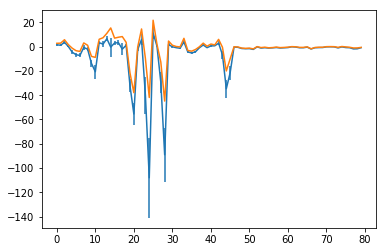

In [105]:
mean1, var1 = np.mean(X_test[group1,:], axis=0), np.std(X_test[group1,:], axis=0) / sum(group1) ** .5
mean2, var2 = np.mean(X_test[group2,:], axis=0), np.std(X_test[group2,:], axis=0) / sum(group2) ** .5
print(mean1.shape, mean2.shape)
plt.errorbar(np.arange(80), y=mean2 - mean1, yerr=(var1**2 + var2**2)**.5)
plt.errorbar(np.arange(80), y=mean2 - mean1 + 2 * (var1**2 + var2**2)**.5)
print(np.argsort(mean2 - mean1 + 2 *(var1**2 + var2**2)**.5))
print(mean2 - mean1 + 2 *(var1**2 + var2**2)**.5)

In [77]:
plt.errorbar

<function matplotlib.pyplot.errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, hold=None, data=None, **kwargs)>

Text(0,0.5,'H3K4me1_c14c')

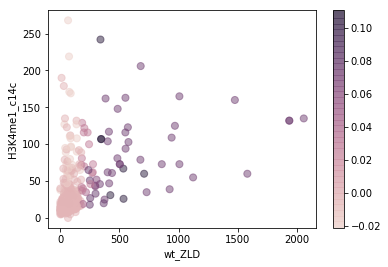

In [108]:
ind1 = 45
ind2 = 20
plt.scatter(X_test[:,ind1], X_test[:,ind2], c = out.loc[:,'f'+str(ind1)] , s = 50, cmap = sns.cubehelix_palette(as_cmap=True), alpha=.5)
plt.colorbar()
plt.xlabel(data.columns[ind1])
plt.ylabel(data.columns[ind2])